<a href="https://colab.research.google.com/github/KrushnaChaure/Netflix-Movies-and-TV-Shows-Clustering/blob/main/Krushna_Chaure_Netflix_Movies_and_TV_Shows_Clustering_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name - Netflix Movies and TV Shows Clustering**

**Project Type** - Unsupervised Machine Learning

**Contribution** - Individual 

# **Problem Statement**

Netflix is the world's largest online streaming service provider, with over 220 million subscribers as of 2022-Q2. It is crucial that they effectively cluster the shows that are hosted on their platform in order to enhance the user experience, thereby preventing subscriber churn.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

We will be able to understand the shows that are similar to and different from one another by creating clusters, which may be leveraged to offer the consumers personalized show suggestions depending on their preferences.

The goal of this project is to classify/group the Netflix shows into certain clusters such that the shows within a cluster are similar to each other and the shows in different clusters are dissimilar to each other.

## **What is our Business Objective?**




*   Exploratory Data Analysis.

*   Understanding what type content is available in different countries.
*   Is Netflix has increasingly focusing on TV rather than movies in recent years.


*   Clustering similar content by matching text-based features.



# **Lets Begin & Kick start our journy**

## **1. Know Our Data**

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.pyplot import figure
import plotly.graph_objects as go
import plotly.offline as py
import plotly.express as px
from datetime import datetime as dt

from wordcloud import WordCloud, STOPWORDS
import re, string, unicodedata

import nltk
from bs4 import BeautifulSoup
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import string
string.punctuation
nltk.download('omw-1.4')
from nltk.tokenize import TweetTokenizer

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


### Dataset Loading


In [2]:
# Firstly we mount the drive over this colab notebook
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Here we connecting & importing the dataset over this colab notebook
dataset= pd.read_csv('/content/drive/MyDrive/Almabetter/Module 4/Netflix Movies and TV Shows Clustering/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

### Attribute Information:

**1. show_id :** Unique ID for every Movie / Tv Show

**2. type :** Identifier - A Movie or TV Show

**3. title :** Title of the Movie / Tv Show

**4. director :** Director of the Movie

**5. cast :** Actors involved in the movie / show

**6. country :** Country where the movie / show was produced

**7. date_added :** Date it was added on Netflix

**8. release_year :** Actual Releaseyear of the movie / show

**9. rating :** TV Rating of the movie / show

**10. duration :** Total Duration - in minutes or number of seasons

**11. listed_in :** Genere

**12. description:** The Summary description

### Dataset First View

In [4]:
dataset.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


### Dataset Rows & Columns count

In [5]:
# For finding how many rows & columns in our dataset
dataset.shape

(7787, 12)

### Dataset Information

In [6]:
# For finding information about our dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


### Duplicate Values

In [7]:
# Here we checking duplicate values in our dataset
len(dataset[dataset.duplicated()])

0

### Missing Values/Null Values

In [8]:
# For checking NAN or Misssing/Null values in our dataset
print(dataset.isnull().sum())

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64


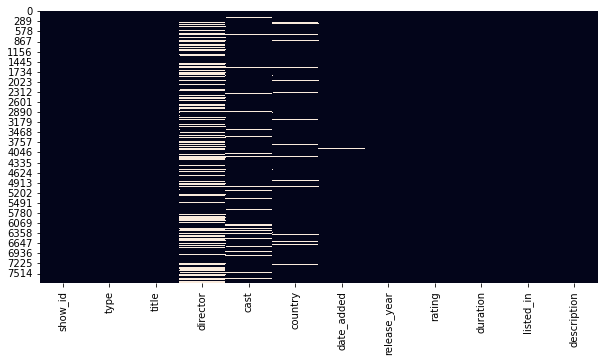

In [9]:
# Visualizing the missing values
# Checking Null Value by plotting Heatmap
plt.figure(figsize=(10,5))
sns.heatmap(dataset.isnull(), cbar=False)

In [10]:
# Handling the missing values

# The missing values in the director, cast, and country attributes can be replaced with 'Unknown'
dataset[['director','cast','country']] = dataset[['director','cast','country']].fillna('Unknown')

# The missing values in rating can be imputed with its mode, since this attribute is discrete.
dataset['rating'] = dataset['rating'].fillna(dataset['rating'].mode()[0])

# Drop missing value in date_added column.
dataset.dropna(axis=0, inplace = True)

### Understanding and Found some information about our dataset

*   This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search.
*   The dataset contains 7787 records(Rows) and 12 attributes(Columns).
*   There are no duplicated records in the dataset.
*   There are many missing values in director, cast, country, date_added, and rating columns.

*   Hence The missing values in the director, cast, and country attributes can be replaced with 'Unknown' & The missing values in rating can be imputed with its mode, since this attribute is discrete & 10 records with missing values in the date_added column can be dropped.







In [11]:
# View new dataset
dataset.shape

(7777, 12)

## **2. Now understanding the variables available in dataset** 

In [12]:
# Dataset column name
dataset.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [13]:
# Dataset description
dataset.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7777,7777,7777,7777,7777,7777,7777,7777.000000,7777,7777,7777,7777
unique,7777,2,7777,4050,6822,682,1565,NaN,14,216,491,7759
top,s1,Movie,3%,Unknown,Unknown,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,2379,718,2549,118,NaN,2868,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.935965,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.760694,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


### Checking Unique Values for each variable in dataset

In [14]:
# For checking unique values in each column
for i in dataset.columns.tolist():
  print('No. of unique values in ',i,'is',dataset[i].nunique())

No. of unique values in  show_id is 7777
No. of unique values in  type is 2
No. of unique values in  title is 7777
No. of unique values in  director is 4050
No. of unique values in  cast is 6822
No. of unique values in  country is 682
No. of unique values in  date_added is 1565
No. of unique values in  release_year is 73
No. of unique values in  rating is 14
No. of unique values in  duration is 216
No. of unique values in  listed_in is 491
No. of unique values in  description is 7759


## **3. Data Wrangling**

### Country & listed_in column

In [15]:
# Top countries
dataset.country.value_counts()

United States                                                   2549
India                                                            923
Unknown                                                          506
United Kingdom                                                   396
Japan                                                            225
                                                                ... 
Russia, United States, China                                       1
Italy, Switzerland, France, Germany                                1
United States, United Kingdom, Canada                              1
United States, United Kingdom, Japan                               1
Sweden, Czech Republic, United Kingdom, Denmark, Netherlands       1
Name: country, Length: 682, dtype: int64

In [16]:
# Genre of shows
dataset.listed_in.value_counts()

Documentaries                                                                      334
Stand-Up Comedy                                                                    321
Dramas, International Movies                                                       320
Comedies, Dramas, International Movies                                             243
Dramas, Independent Movies, International Movies                                   215
                                                                                  ... 
Anime Series, Crime TV Shows, TV Thrillers                                           1
Crime TV Shows, Romantic TV Shows, Spanish-Language TV Shows                         1
Crime TV Shows, International TV Shows, Reality TV                                   1
International Movies, Romantic Movies, Sci-Fi & Fantasy                              1
International TV Shows, Spanish-Language TV Shows, Stand-Up Comedy & Talk Shows      1
Name: listed_in, Length: 491, dtype: int64

From above country and listed_in column:-

*   There are some movies / TV shows that were filmed in multiple countries, have multiple genres associated with it.
*   To simplify the analysis, let's consider only the primary country where that respective movie / TV show was filmed. Also, let's consider only the primary genre of the respective movie / TV show.



In [17]:
# Choosing the primary country and primary genre to simplify the analysis
dataset['country'] = dataset['country'].apply(lambda x: x.split(',')[0])
dataset['listed_in'] = dataset['listed_in'].apply(lambda x: x.split(',')[0])

In [18]:
# contry in which a movie was produced
dataset.country.value_counts()

United States     2877
India              956
United Kingdom     576
Unknown            506
Canada             259
                  ... 
Zimbabwe             1
Namibia              1
Soviet Union         1
Iran                 1
Somalia              1
Name: country, Length: 82, dtype: int64

In [19]:
# genre of shows
dataset.listed_in.value_counts()

Dramas                          1384
Comedies                        1074
Documentaries                    751
Action & Adventure               721
International TV Shows           689
Children & Family Movies         502
Crime TV Shows                   369
Kids' TV                         357
Stand-Up Comedy                  321
Horror Movies                    244
British TV Shows                 231
Docuseries                       193
Anime Series                     147
International Movies             114
TV Comedies                      109
Reality TV                       102
Classic Movies                    77
TV Dramas                         62
Movies                            56
Thrillers                         49
TV Action & Adventure             36
Stand-Up Comedy & Talk Shows      33
Romantic TV Shows                 28
Independent Movies                20
Anime Features                    19
Classic & Cult TV                 19
Music & Musicals                  17
T

### Converting 'duration' column datatype from string to integer

In [20]:
# Splitting the duration column, and changing the datatype to integer
dataset['duration'] = dataset['duration'].apply(lambda x: int(x.split()[0]))

In [21]:
# Number of seasons for tv shows
dataset[dataset['type']=='TV Show'].duration.value_counts()

1     1608
2      378
3      183
4       86
5       57
6       30
7       19
8       18
9        8
10       5
11       2
12       2
15       2
13       1
16       1
Name: duration, dtype: int64

In [22]:
# Movie length in minutes
dataset[dataset['type']=='Movie'].duration.unique()

array([ 93,  78,  80, 123,  95, 119, 118, 143, 103,  89,  91, 149, 144,
       124,  87, 110, 128, 117, 100,  84,  99,  90, 102, 104, 105,  56,
       125,  81,  97, 106, 107, 109,  44,  75, 101,  37, 113, 114, 130,
        94, 140, 135,  82,  70, 121,  92, 164,  53,  83, 116,  86, 120,
        96, 126, 129,  77, 137, 148,  28, 122, 176,  85,  22,  68, 111,
        29, 142, 168,  21,  59,  20,  98, 108,  76,  26, 156,  30,  57,
       150, 133, 115, 154, 127, 146, 136,  88, 131,  24, 112,  74,  63,
        38,  25, 174,  60, 153, 158, 151, 162,  54,  51,  69,  64, 147,
        42,  79,  40,  45, 172,  10, 163,  55,  72,  61,  71, 160, 171,
        48, 139, 157,  15,  65, 134, 161,  62, 186,  49,  73,  58, 165,
       166, 138, 159, 141, 132,  52,  67,  34,  66, 312, 180,  47, 155,
        14, 177,  11,   9,  46, 145,   8,  12,  43,  50,  23, 185, 200,
       169,  27, 170, 196,  33, 181, 204,  32,  35, 167, 179, 193,  13,
       214,  17, 173, 192, 209, 187,  41, 182, 224, 233, 189, 15

In [23]:
# datatype of duration
dataset.duration.dtype

dtype('int64')

### Converting 'date_added' column from string to datetime format

In [24]:
# Converting 'date_added' from string to datetime
dataset["date_added"] = pd.to_datetime(dataset['date_added'])

In [25]:
# first and last date on which a show was added on Netflix
dataset.date_added.min(),dataset.date_added.max()

(Timestamp('2008-01-01 00:00:00'), Timestamp('2021-01-16 00:00:00'))

From above

*   The shows were added on Netflix between 1st January 2008 and 16th January 2021.



In [26]:
# Adding new attributes month_added & year_added from date_added column
dataset['month_added'] = dataset['date_added'].dt.month
dataset['year_added'] = dataset['date_added'].dt.year

# Drop date_added column
dataset.drop('date_added', axis=1, inplace=True)

In [27]:
# New Dataset Rows & Columns 
dataset.shape

(7777, 13)

### Changing the values name in the rating column for better understanding and insights

In [28]:
# Changing the values in the rating column
rating_map = {'TV-MA':'Adults',
              'R':'Adults',
              'PG-13':'Teens',
              'TV-14':'Young Adults',
              'TV-PG':'Older Kids',
              'NR':'Adults',
              'TV-G':'Kids',
              'TV-Y':'Kids',
              'TV-Y7':'Older Kids',
              'PG':'Older Kids',
              'G':'Kids',
              'NC-17':'Adults',
              'TV-Y7-FV':'Older Kids',
              'UR':'Adults'}

dataset['rating'].replace(rating_map, inplace = True)
dataset['rating'].unique()
     

array(['Adults', 'Teens', 'Young Adults', 'Older Kids', 'Kids'],
      dtype=object)

In [29]:
# Dataset Info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7777 entries, 0 to 7786
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7777 non-null   object
 1   type          7777 non-null   object
 2   title         7777 non-null   object
 3   director      7777 non-null   object
 4   cast          7777 non-null   object
 5   country       7777 non-null   object
 6   release_year  7777 non-null   int64 
 7   rating        7777 non-null   object
 8   duration      7777 non-null   int64 
 9   listed_in     7777 non-null   object
 10  description   7777 non-null   object
 11  month_added   7777 non-null   int64 
 12  year_added    7777 non-null   int64 
dtypes: int64(4), object(9)
memory usage: 850.6+ KB


Hurry, now our dataset is complately ready for EDA 

## **4. EDA, Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables**

### **1. Univariate Analysis**

Univariate analysis explores each variable in a data set, separately. 

Uni means one, so in other words the data has only one variable. Univariate data requires to analyze each variable separately. 

It looks at the range of values, as well as the central tendency of the values. It describes the pattern of response to the variable. It describes each variable on its own.

Now Below is some variables which we doing analysis over them:- 

#### Chart-1

Here we use pie chart

A pie chart, sometimes called a circle chart, is a way of summarizing a set of nominal data or displaying the different values of a given variable.

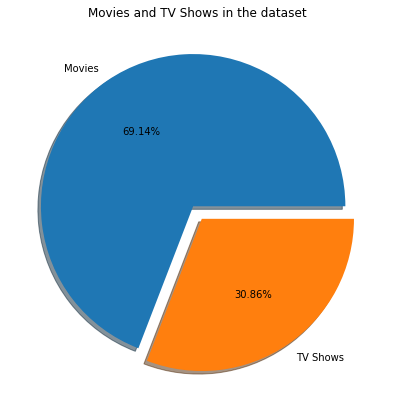

In [30]:
# Number of Movies and TV Shows in the dataset
plt.figure(figsize=(10,7))
y = dataset.type.value_counts()
mylabels = ['Movies', 'TV Shows']
myexplode = [0.05, 0.05]
plt.pie(y,labels = mylabels, explode = myexplode,autopct='%1.2f%%', shadow = True)
plt.title('Movies and TV Shows in the dataset')
plt.show() 

From above pie chart:-

*   There are higher movies 69.14% in datset as compare to TV shows 30.86% in the dataset.



#### Chart-2

Here we use bar plot

A barplot (or barchart) is one of the most common types of graphic. It shows the relationship between a numeric and a categoric variable. Each entity of the categoric variable is represented as a bar. The size of the bar represents its numeric value.

Text(0.5, 1.0, 'Top 10 directors by number of shows directed')

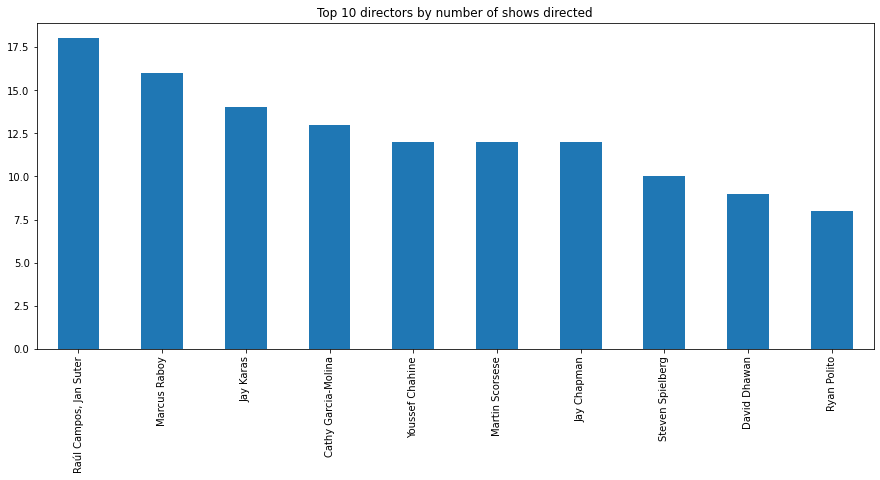

In [31]:
# Top 10 directors in the dataset
plt.figure(figsize=(15,6))
dataset[~(dataset['director']=='Unknown')].director.value_counts().nlargest(10).plot(kind='bar')
plt.title('Top 10 directors by number of shows directed')

From above bar plot there are showing Top 10 directors by number of shows directed:-

*   Raul Campos and Jan Suter together have directed 18 movies / TV shows, which is higher than anyone in the top 10 director in dataset.
*   Ryan polito & david dhawan have lowest no of directed movies / TV shows which is 8 & 9 respectively in top 10 director dataset.



#### Chart-3

Here we use bar plot

Text(0.5, 1.0, ' Top 10 countries with the highest number of shows')

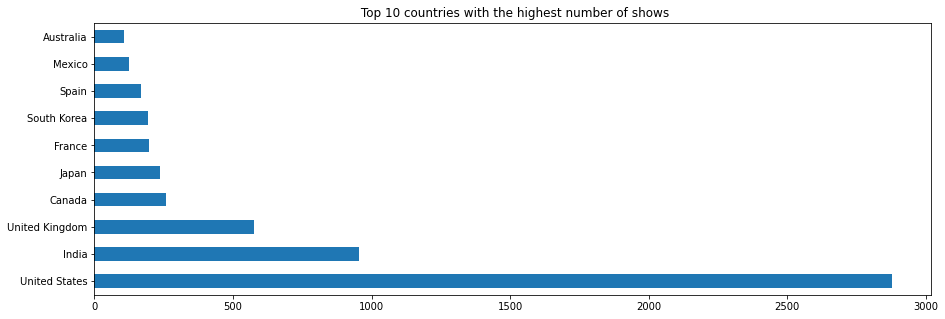

In [32]:
# Top 10 countries with the highest number movies / TV shows in the dataset
plt.figure(figsize=(15,5))
dataset[~(dataset['country']=='Unknown')].country.value_counts().nlargest(10).plot(kind='barh')
plt.title(' Top 10 countries with the highest number of shows')

In [33]:
# % share of movies / tv shows by top 3 countries
dataset.country.value_counts().nlargest(3).sum()/len(dataset)*100

56.69281213835669

In [34]:
# % share of movies / tv shows by top 10 countries
dataset.country.value_counts().nlargest(10).sum()/len(dataset)*100

78.32068921177832

From above bar plot showing Top 10 countries with the highest number of movies / TV shows in the dataset:-

*   United States are the top one country of highest number of movies / TV shows in the dataset and then after India & United Kingdom are 2 & 3 Number in dataset
*   Mexico & Australia have 9 & 10 position in Top 10 countries with the highest number of movies / TV shows in the dataset.

*   The top 3 countries together account for about 56% of all movies and TV shows in the dataset.
*   Where the top ten countries together account for about 78% of all movies and TV shows in the dataset.





#### Chart-4

Here we use Histogram

In statistics, a histogram is a graphical representation of the distribution of data. The histogram is represented by a set of rectangles, adjacent to each other, where each bar represent a kind of data.

Text(0.5, 1.0, 'Distribution by Released Year')

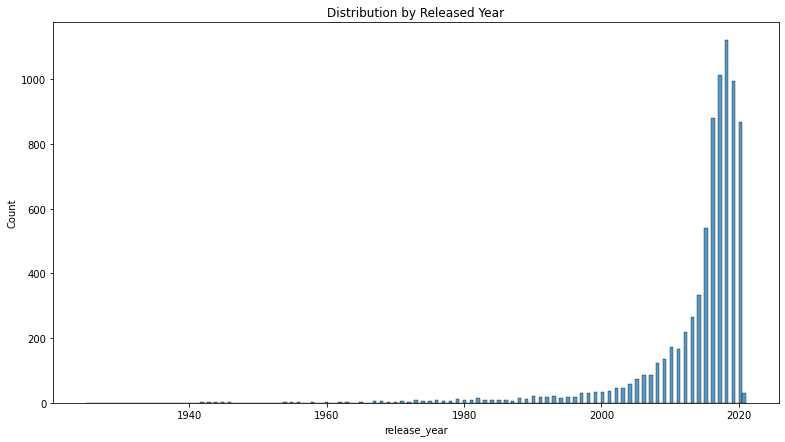

In [35]:
# Visualizing the year in which the movie / tv show was released
plt.figure(figsize=(13,7))
sns.histplot(dataset['release_year'])
plt.title('Distribution by Released Year')

from above histogram

*   Most number of movies / TV shows are released between 2000 to 2020 years where it goes high in recently years which between 2015 to 2020.


#### Chart-5

Here we use countplot

countplot() method is used to Show the counts of observations in each categorical bin using bars.

Text(0.5, 1.0, 'Number of shows added each year')

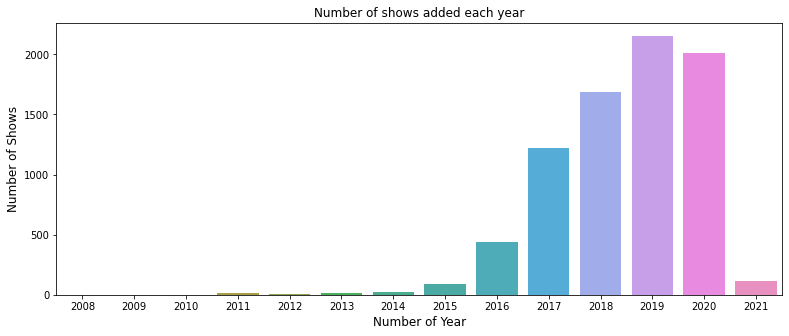

In [36]:
# Number of shows added over the years
plt.figure(figsize = (13,5)) 
sns.countplot(dataset['year_added'])
plt.xlabel('Number of Year',fontsize=12)
plt.ylabel('Number of Shows',fontsize=12)
plt.title('Number of shows added each year')

From above countplot:-

*   Netflix continuous to add more shows on its platform over the few years.
*   There is a decrease in the number of shows added in the year 2020, which might be attributed to the covid-19-induced lockdowns, which halted the creation of shows.

*   We have Netflix data only up to 16th January 2021, hence there are less movies added in this year.





#### Chart-6

Here we use countplot

countplot() method is used to Show the counts of observations in each categorical bin using bars.

Text(0.5, 1.0, 'Shows added each month over the years')

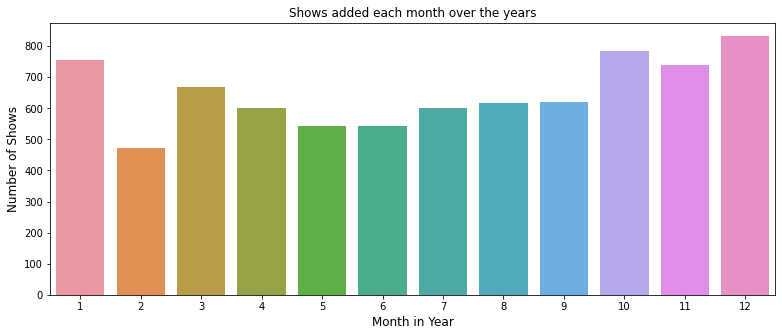

In [37]:
# Number of shows added on different months
plt.figure(figsize = (13,5)) 
sns.countplot(dataset['month_added'])
plt.xlabel('Month in Year',fontsize=12)
plt.ylabel('Number of Shows',fontsize=12)
plt.title('Shows added each month over the years')

From above countplot:-

*   Over the years a greater number of shows were added in the months of October, November, December, and January.
*   February, May, June were less number of shows added Over the years.



#### Chart-7

Here we use countplot

countplot() method is used to Show the counts of observations in each categorical bin using bars.

Text(0.5, 1.0, 'Number of shows on Netflix for different age groups')

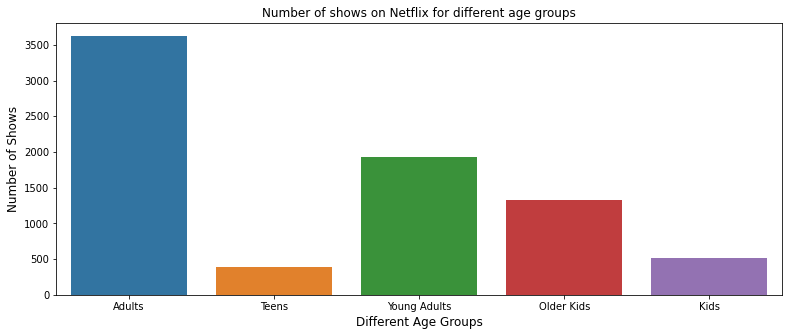

In [38]:
# Age ratings for shows in the dataset
plt.figure(figsize=(13,5))
sns.countplot(x='rating',data=dataset)
plt.xlabel('Different Age Groups',fontsize=12)
plt.ylabel('Number of Shows',fontsize=12)
plt.title('Number of shows on Netflix for different age groups')

From above countplot:-

*   Adults are the highest number of shows and second highest is Young Adults and third highest is older Kids shows.
*   Teens and kids are less number of shows on netflix as compare to other.



#### Chart-8

Here we use barplot

A bar graph is a graphical representation of data in which we can highlight the category with particular shapes like a rectangle. The length and heights of the bar chart represent the data distributed in the dataset. In a bar chart, we have one axis representing a particular category of a column in the dataset and another axis representing the values or counts associated with it. Bar charts can be plotted vertically or horizontally. A vertical bar chart is often called a column chart.

Text(0.5, 1.0, 'Top 10 genres')

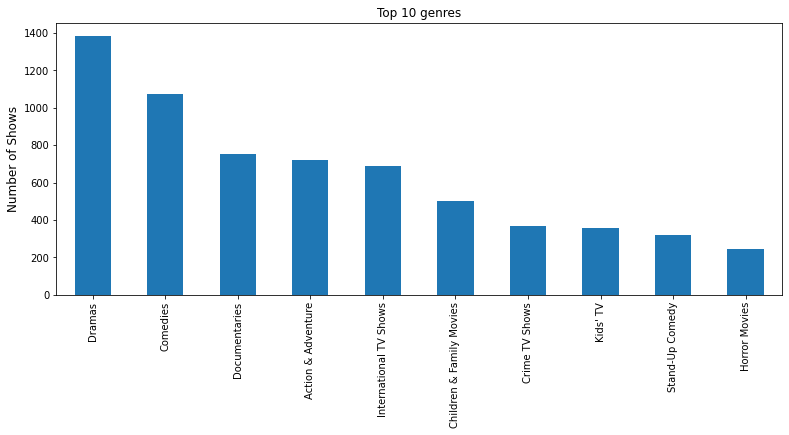

In [39]:
# Top 10 genres 
plt.figure(figsize=(13,5))
dataset.listed_in.value_counts().nlargest(10).plot(kind='bar')
plt.ylabel('Number of Shows',fontsize=12)
plt.title('Top 10 genres')

In [40]:
# % of top 10 genres
dataset.listed_in.value_counts().nlargest(10).sum()/len(dataset)*100

82.44824482448246

From above bar plot there are showing Top 10 genres by number of shows:-

*   There are top ten genres account for about 82% of all movies and TV shows.
*   The dramas is the most popular genres then comedies genres is second highest and documentries is third highest.

*   Genres of stand up comedy and horror movies are ninth and tenth highest in dataset.

#### Chart-9

Here we use bar plot

A bar plot shows catergorical data as rectangular bars with the height of bars proportional to the value they represent. It is often used to compare between values of different categories in the data.

In [41]:
# seperating actor from cast column
cast =dataset[~(dataset['cast']=='Unknown')].cast.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)

# top actors name who play highest role in movie/show.
cast.value_counts()

Anupam Kher         42
Shah Rukh Khan      35
Om Puri             30
Naseeruddin Shah    30
Akshay Kumar        29
                    ..
Lorenz Martinez      1
Art Acuña            1
Archie Alemania      1
Demore Barnes        1
Rachel Khoo          1
Length: 32847, dtype: int64

Text(0.5, 1.0, 'Top 10 Actors')

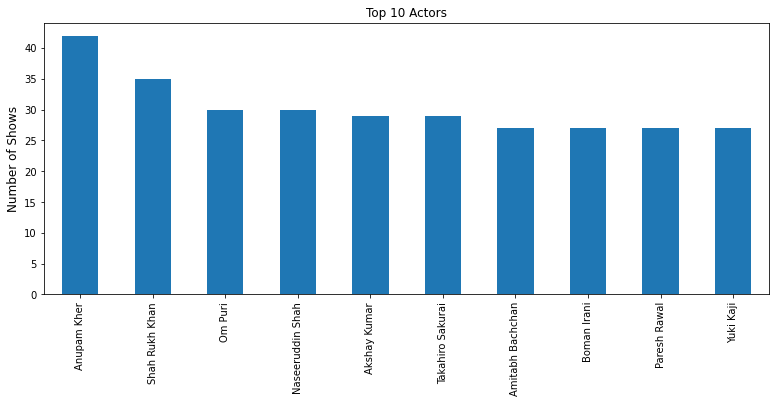

In [42]:
plt.figure(figsize=(13,5))
cast.value_counts().nlargest(10).plot(kind='bar')
plt.ylabel('Number of Shows',fontsize=12)
plt.title('Top 10 Actors')

From above bar plot of top ten actors name who play highest role in movie/show.

*   Anupam kher play highest role in movie/show where shah rukh khan play secong highest role in movie/show. 
*   Paresh rawal, yuki kaji play ninth & tenth highest role in movie/show.

### **2. Bivariate Analysis**

Bivariate analysis is one of the statistical analysis where two variables are observed. 

One variable here is dependent while the other is independent.

here we analyse the changes occured between the two variables and to what extent.

Now Below is some variables which we doing analysis over them:-

#### Chart-1

Here we use countplot

countplot() method is used to Show the counts of observations in each categorical bin using bars.

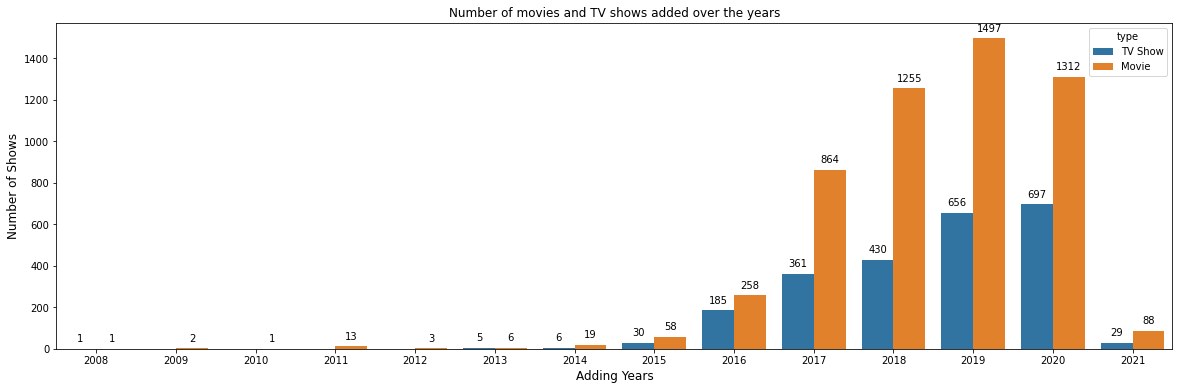

In [43]:
# Number of movies and TV shows added over the years
plt.figure(figsize=(20,6))
p = sns.countplot(x='year_added',data=dataset, hue='type')
plt.xlabel('Adding Years',fontsize=12)
plt.ylabel('Number of Shows',fontsize=12)
plt.title('Number of movies and TV shows added over the years')
for i in p.patches:
  p.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')


From above countplot

*   Most of the years have more movies adding as compare to TV shows in Netflix.
*   Also Over the last few years from 2015 to 2021 Netflix has consistently focused on adding more shows in its platform.



#### Chart-2

Here we use countplot

countplot() method is used to Show the counts of observations in each categorical bin using bars.

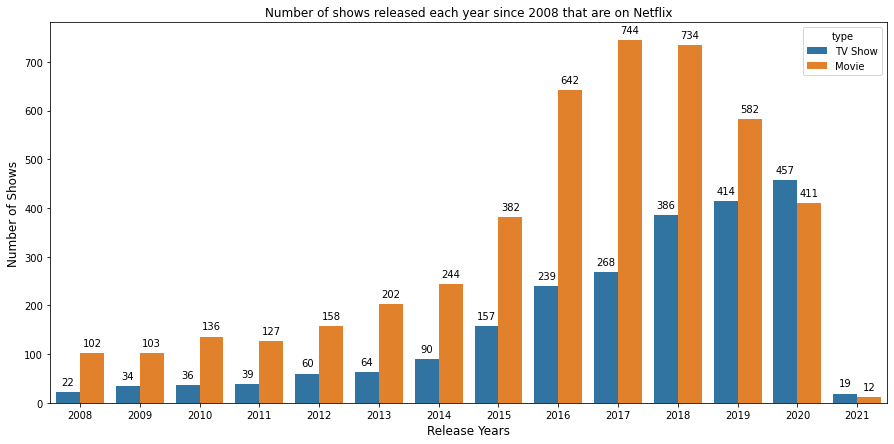

In [44]:
# Number of shows released each year since 2008
order = range(2008,2022)
plt.figure(figsize=(15,7))
p = sns.countplot(x='release_year',data=dataset, hue='type',
                  order = order)
plt.xlabel('Release Years',fontsize=12)
plt.ylabel('Number of Shows',fontsize=12)
plt.title('Number of shows released each year since 2008 that are on Netflix')

for i in p.patches:
  p.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

From above countplot:-

*   From 2008 to 2018 Number of releaing Movies & TV Shows gradually increasing in each year.

*   from year 2008 to 2019 movies releasing is higher compare to TV shows.


*   Where year of 2017 & 2018 have highest number of releasing movies which is 744 & 734 respectively.

*   Where year of 2019 & 2020 have highest number of releasing TV Show which is 414 and 457 respectively





#### Chart-3

here we use countplot

A count plot can be thought of as a histogram across a categorical, instead of quantitative, variable. The basic API and options are identical to those for barplot() , so you can compare counts across nested variables.

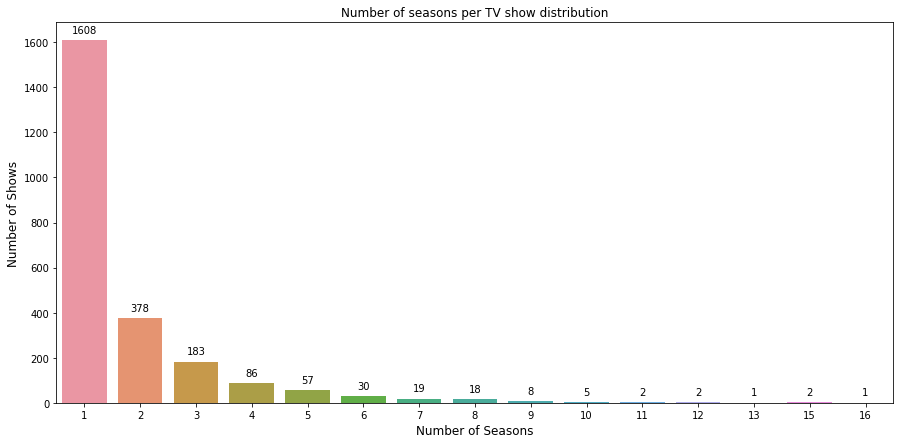

In [45]:
# Seasons in each TV show
plt.figure(figsize=(15,7))
p = sns.countplot(x='duration',data=dataset[dataset['type']=='TV Show'])
plt.xlabel('Number of Seasons',fontsize=12)
plt.ylabel('Number of Shows',fontsize=12)
plt.title('Number of seasons per TV show distribution')

for i in p.patches:
  p.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

From above countplot:-

*   Total season of tv shows is upto 16.
*   Most of the season of tv shows is one This might mean that the majority of TV shows has only recently begun, and that further seasons are on the way.

*   There are very few TV shows that have more than 8 seasons.

#### Chart-4

Here we use distplot

We use a displot (also known as a distribution plot) to represent data in histogram form. It is a univariant set of collected data, which means the data distribution of one variable will be shown against another variable and it represents the overall distribution of continuous data variables.

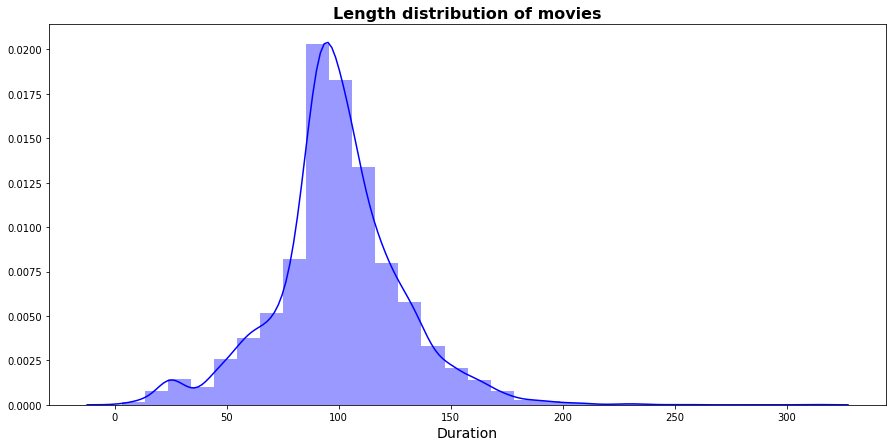

In [46]:
# Length distribution of movies
movie_df = dataset[dataset['type']=='Movie']

plt.figure(figsize=(15, 7))

sns.distplot(movie_df['duration'], bins=30,color='Blue').set(ylabel=None)

plt.title('Length distribution of movies', fontsize=16,fontweight="bold")
plt.xlabel('Duration', fontsize=14)
plt.show()

In [47]:
# Movie statistics
dataset[dataset['type']== 'Movie'].duration.describe()

count    5377.000000
mean       99.307978
std        28.530881
min         3.000000
25%        86.000000
50%        98.000000
75%       114.000000
max       312.000000
Name: duration, dtype: float64

From above distplot:-

*   The length of a movie may range from 3 min to 312 minutes.
*   Most of the movie length between 50 to 150 min and there are very less movies hows length is above 200 min hence the distribution is almost normally distributed.

#### Chart-5

Here we use bar plot

A bar plot shows catergorical data as rectangular bars with the height of bars proportional to the value they represent. It is often used to compare between values of different categories in the data.

Text(0.5, 1.0, 'Top 10 genres for movies')

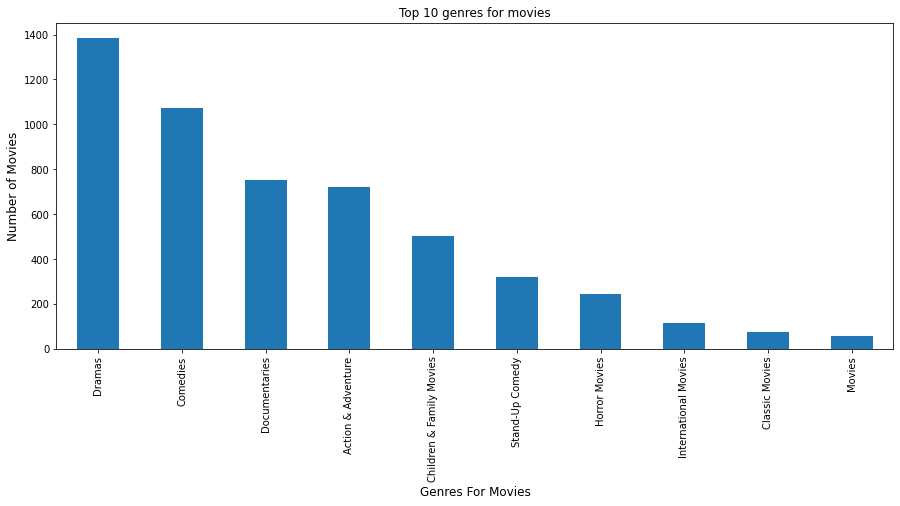

In [48]:
# Top 10 genre for movies
plt.figure(figsize=(15,6))
dataset[dataset['type']=='Movie'].listed_in.value_counts().nlargest(10).plot(kind='bar')
plt.xlabel('Genres For Movies',fontsize=12)
plt.ylabel('Number of Movies',fontsize=12)
plt.title('Top 10 genres for movies')
     

From above bar plot of top ten genres movies:-

*   Drama genre have the highest number of movies where comedies genre have second highest and documentries genre have third highest in dataset.
*   Calssic movies genre and movie genre have ninth & tenth position respectively in dataset.



#### Chart-6

Here we use bar plot

A bar plot shows catergorical data as rectangular bars with the height of bars proportional to the value they represent. It is often used to compare between values of different categories in the data.

Text(0.5, 1.0, 'Top 10 genres for TV Shows')

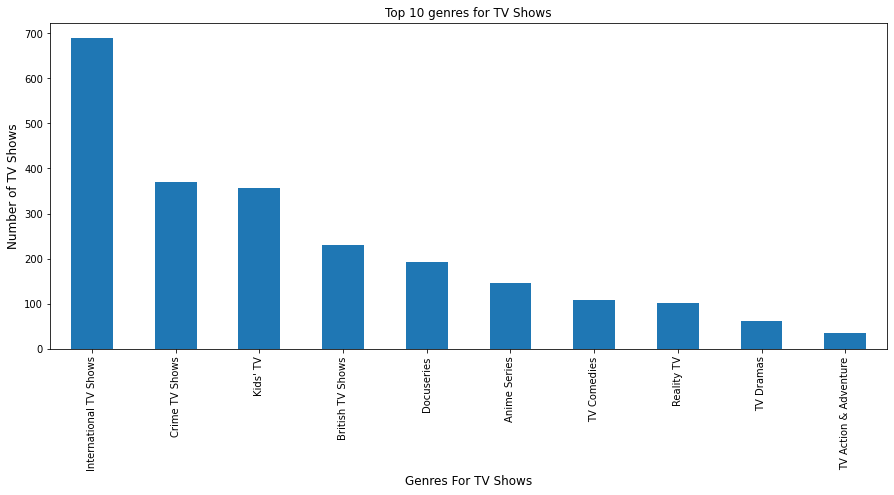

In [49]:
# Top 10 genre for movies
plt.figure(figsize=(15,6))
dataset[dataset['type']=='TV Show'].listed_in.value_counts().nlargest(10).plot(kind='bar')
plt.xlabel('Genres For TV Shows',fontsize=12)
plt.ylabel('Number of TV Shows',fontsize=12)
plt.title('Top 10 genres for TV Shows')

From above bar plot of top ten genres of TV Shows:-

*   International genre have the highest number of TV Shows where crime genre have second highest and kids genre have third highest in dataset.
*   Dramas genre and action&adventure genre have ninth & tenth position respectively in dataset.



#### Chart-7

Here we use bar plot

A bar plot shows catergorical data as rectangular bars with the height of bars proportional to the value they represent. It is often used to compare between values of different categories in the data.

Text(0.5, 1.0, 'Top 10 movie directors')

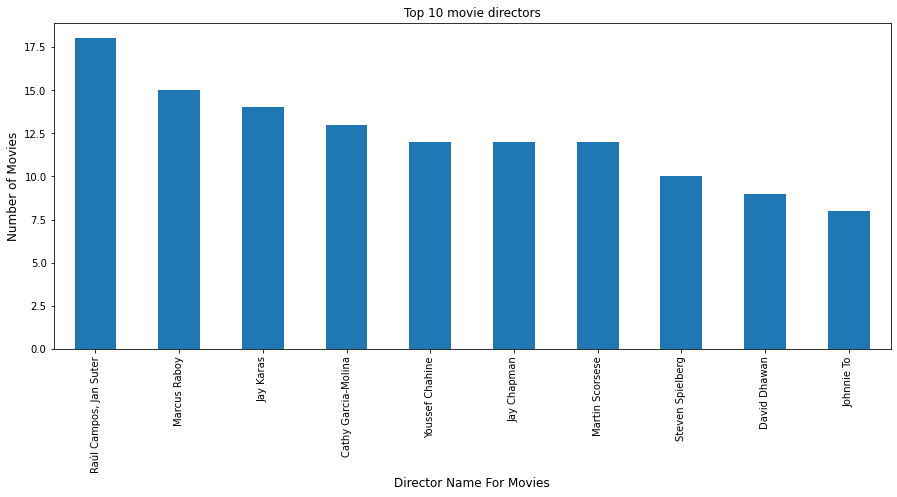

In [50]:
# Top 10 movie directors
plt.figure(figsize=(15,6))
dataset[~(dataset['director']=='Unknown') & (dataset['type']=='Movie')].director.value_counts().nlargest(10).plot(kind='bar')
plt.xlabel('Director Name For Movies',fontsize=12)
plt.ylabel('Number of Movies',fontsize=12)
plt.title('Top 10 movie directors')

From above bar plot of top ten Movie directors:-

*   Raul Campos and Jan Suter have togather directed in 18 movies which is have the highest number of movies where Marcus Raboy have second highest and Jay Keras have third highest in dataset.
*   David Dhawan directed movies and Johnnie To directed movies have ninth & tenth position respectively in dataset.

#### Chart-8

Here we use horizontal bar plot

A horizontal bar plot is a plot that presents quantitative data with rectangular bars with lengths proportional to the values that they represent. A bar plot shows comparisons among discrete categories. One axis of the plot shows the specific categories being compared, and the other axis represents a measured value.

Text(0.5, 1.0, 'Top 10 TV Show directors')

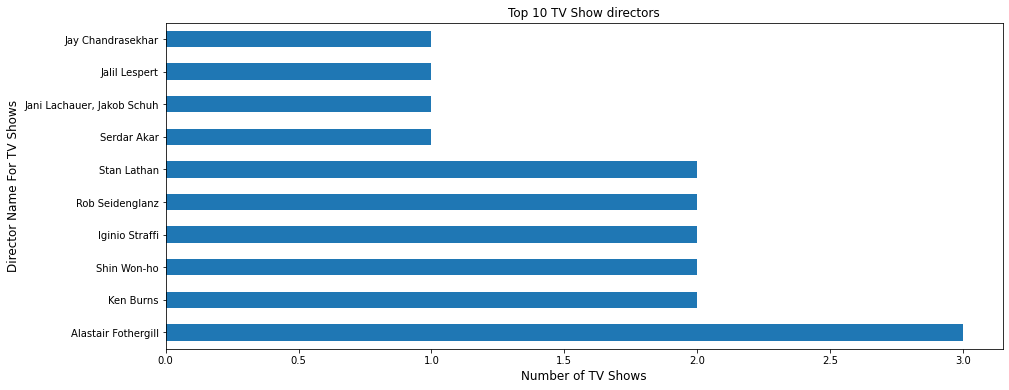

In [51]:
# Top 10 TV Shows directors
plt.figure(figsize=(15,6))
dataset[~(dataset['director']=='Unknown') & (dataset['type']=='TV Show')].director.value_counts().nlargest(10).plot(kind='barh')
plt.xlabel('Number of TV Shows',fontsize=12)
plt.ylabel('Director Name For TV Shows',fontsize=12)
plt.title('Top 10 TV Show directors')

From above bar plot of top ten TV Show directors:-

*   Alastair Fothergill has directed three TV shows, the most of any director.
*   Only six directors have directed more than one television show, remaining all directors direct only one TV shows.



#### Chart-9

Here we use bar plot

A bar plot shows catergorical data as rectangular bars with the height of bars proportional to the value they represent. It is often used to compare between values of different categories in the data.

Text(0.5, 1.0, 'Actors who have appeared in highest number of movies')

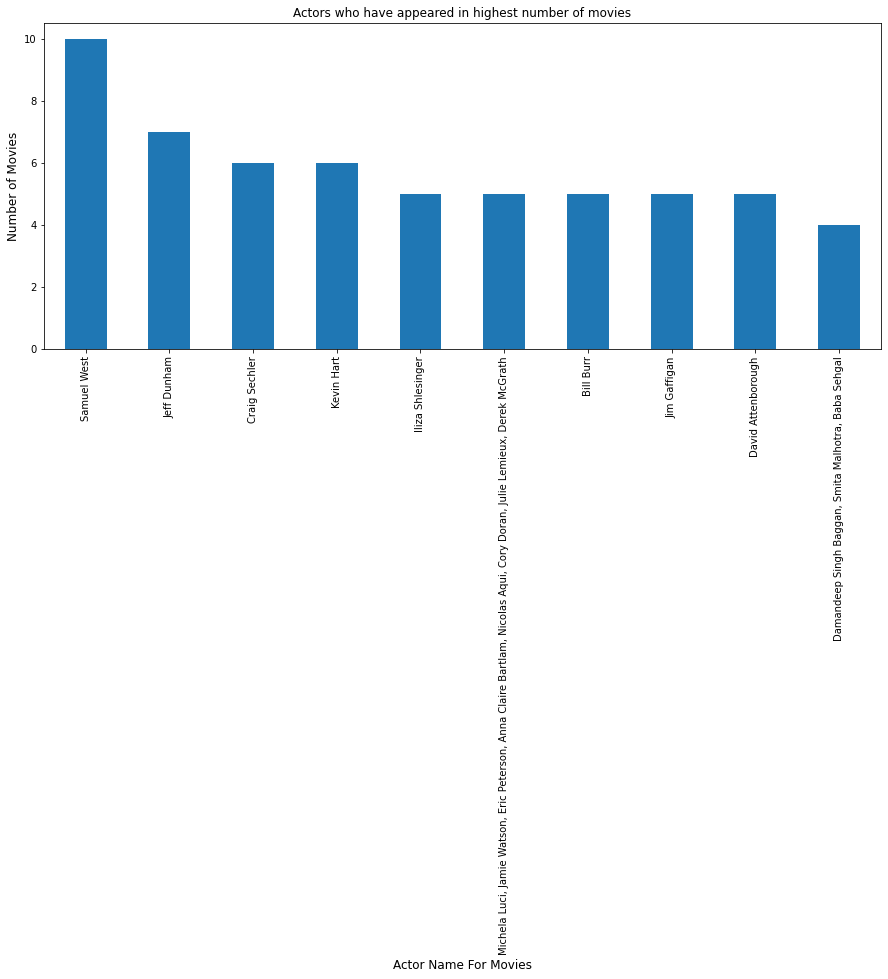

In [52]:
# Top actors for movies
plt.figure(figsize=(15,6))
dataset[~(dataset['cast']=='Unknown') & (dataset['type']=='Movie')].cast.value_counts().nlargest(10).plot(kind='bar')
plt.xlabel('Actor Name For Movies',fontsize=12)
plt.ylabel('Number of Movies',fontsize=12)
plt.title('Actors who have appeared in highest number of movies')

From above bar plot of top ten Actor movies:-

*   Top one actor in movies are Samuel West who appeared in 10 movies and second highest actor are jeff Dunham who appeared in 7 movies and third highest actor of movies are Craig Sechler and Kevin Hart who appeared in 6 movies equally.

#### Chart-9

Text(0.5, 1.0, 'Actors who have appeared in highest number of TV Shows')

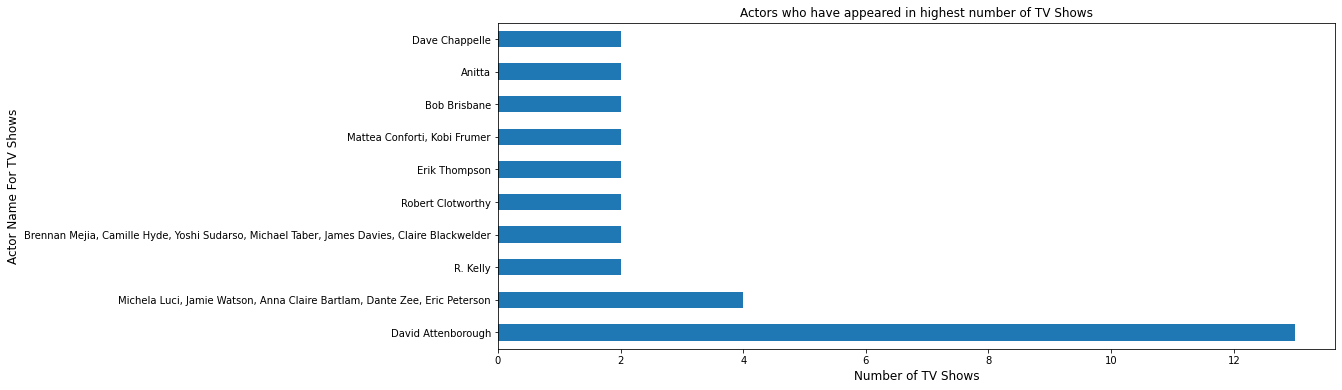

In [53]:
# Top actors for TV Shows
plt.figure(figsize=(15,6))
dataset[~(dataset['cast']=='Unknown') & (dataset['type']=='TV Show')].cast.value_counts().nlargest(10).plot(kind='barh')
plt.xlabel('Number of TV Shows',fontsize=12)
plt.ylabel('Actor Name For TV Shows',fontsize=12)
plt.title('Actors who have appeared in highest number of TV Shows')

From above horizontal bar plot of top ten Actors TV Shows:-

*   David Attenborough has appeared in 13 TV shows, followed by Michela Luci, Jamie Watson, Anna Claire Bartlam, Dante Zee, Eric Peterson with 4 TV shows.
*   remaining actors from third to tenth position have equally appeared 2 Tv Shows.

### **3. Multivariate Analysis**

Multivariate analysis (MVA) involves evaluating multiple variables (more than two) to identify any possible association among them. 



#### 1. Correlation Heatmap



Here we use heatmap for Multivariate Analysis 

What is Heatmap:-

A heat map is a two-dimensional representation of data in which values are represented by colors. A simple heat map provides an immediate visual summary of information. More elaborate heat maps allow the viewer to understand complex data sets.

In [54]:
dataset['principal_country'] = dataset['country'].apply(lambda x: x.split(",")[0])
dataset['principal_country'].head()

country_order = dataset['principal_country'].value_counts()[:11].index
content_data = dataset[['type', 'principal_country']].groupby('principal_country')['type'].value_counts().unstack().loc[country_order]
content_data['sum'] = content_data.sum(axis=1)
content_data_ratio = (content_data.T / content_data['sum']).T[['Movie', 'TV Show']].sort_values(by='Movie',ascending=False)[::-1]
     

In [55]:
dataset['count'] = 1
data = dataset.groupby('principal_country')[['principal_country','count']].sum().sort_values(by='count',ascending=False).reset_index()[:10]
data = data['principal_country']

Flix_df_heatmap = dataset.loc[dataset['principal_country'].isin(data)]
Flix_df_heatmap = pd.crosstab(Flix_df_heatmap['principal_country'], Flix_df_heatmap['rating'],normalize = "index").T
Flix_df_heatmap
     

principal_country,Canada,France,India,Japan,Mexico,South Korea,Spain,United Kingdom,United States,Unknown
rating,,,,,,,,,,
Adults,0.467181,0.627551,0.259414,0.368644,0.764228,0.463918,0.797619,0.526042,0.489051,0.320158
Kids,0.150579,0.086735,0.015690,0.008475,0.016260,0.046392,0.035714,0.078125,0.074731,0.169960
Older Kids,0.220077,0.112245,0.163180,0.275424,0.089431,0.123711,0.053571,0.184028,0.196038,0.235178
Teens,0.027027,0.030612,0.004184,0.012712,0.016260,0.000000,0.017857,0.071181,0.098366,0.005929
Young Adults,0.135135,0.142857,0.557531,0.334746,0.113821,0.365979,0.095238,0.140625,0.141814,0.268775


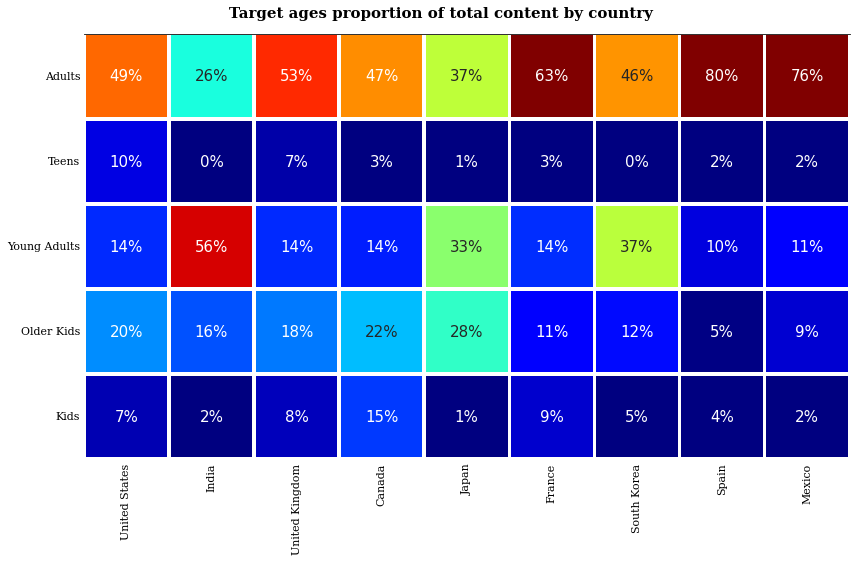

In [56]:
# Plotting the heatmap
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
country_order2 = ['United States', 'India', 'United Kingdom', 'Canada', 'Japan', 'France', 'South Korea', 'Spain',
       'Mexico']

age_order = ['Adults', 'Teens', 'Young Adults', 'Older Kids', 'Kids']

sns.heatmap(Flix_df_heatmap.loc[age_order,country_order2],cmap="jet",square=True, linewidth=2.5,cbar=False,
            annot=True,fmt='2.0%',vmax=.6,vmin=0.05,ax=ax,annot_kws={"fontsize":15})

ax.spines['top'].set_visible(True)

fig.text(.76,.765, 'Target ages proportion of total content by country', fontweight='bold', fontfamily='serif', fontsize=15,ha='right')   

ax.set_yticklabels(ax.get_yticklabels(), fontfamily='serif', rotation = 0, fontsize=11)
ax.set_xticklabels(ax.get_xticklabels(), fontfamily='serif', rotation=90, fontsize=11)

ax.set_ylabel('')    
ax.set_xlabel('')
ax.tick_params(axis=u'both', which=u'both',length=0)
plt.tight_layout()
plt.show()
     


From above Heatmap we can see that:-

*   Most of the country targeted their customer in adult age category then after secondly young adults targeted.
*   Most of the country less targeted to teens age category in that India & spain have 0% targeted.

### **4. Wordcloud**

Word clouds or tag clouds are graphical representations of word frequency that give greater prominence to words that appear more frequently in a source text. The larger the word in the visual the more common the word was in the document(s).

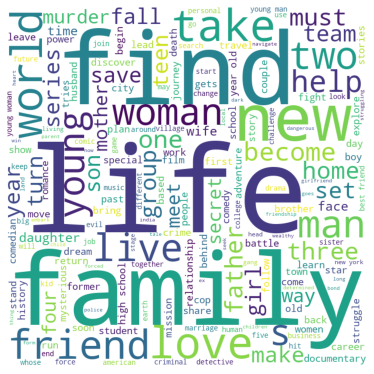

In [59]:
# Building a wordcloud for the movie descriptions
comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in dataset.description.values:
    
    # typecaste each val to string
    val = str(val)

    # split the value
    tokens = val.split()
    
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    
    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 700, height = 700,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)


# plot the WordCloud image                      
plt.figure(figsize = (10,5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

From above wordcloud:-

*   Some keywords that come in many times in Netflix show descriptions: life, family, find, new, love, young, world, group, death, man, woman, murder, son, girl, documentary, secret.



#### **Hurray We have successfully completed our EDA part.**

## **5. Feature Engineering & Data Pre-processing**

Feature engineering is the pre-processing step of machine learning, which is used to transform raw data into features that can be used for creating a predictive model using Machine learning or statistical Modelling. Feature engineering in machine learning aims to improve the performance of models.

Data preprocessing is a process of preparing the raw data and making it suitable for a machine learning model. It is the first and crucial step while creating a machine learning model.



### **Clustering New Attributes**

We will cluster the shows on Netflix based on the following attributes:-

*   Director

*   Cast

*   Country
*   Listed in (genres)


*   Description

In [60]:
# Using the model_df dataset for clustering since
# it does not require handling missing values
df = dataset.copy()  

In [61]:
df.fillna('',inplace=True)

In [62]:
# Combining all the clustering attributes into a single column

df['clustering'] = (df['director'] + ' ' + 
                                df['cast'] +' ' + 
                                df['country'] +' ' + 
                                df['listed_in'] +' ' + 
                                df['description'])
     

In [63]:
# Select the 100 number of clusters for the dataset 
df['clustering'][100]

"Rajkumar Hirani Aamir Khan, Kareena Kapoor, Madhavan, Sharman Joshi, Omi Vaidya, Boman Irani, Mona Singh, Javed Jaffrey India Comedies While attending one of India's premier colleges, three miserable engineering students and best friends struggle to beat the school's draconian system."

### **Remove stopwords and lower case**

Removing stop words and lowercasing words are common pre-processing steps in natural language processing (NLP) tasks.

**Stop words** are words that are commonly used in a language but do not convey much meaning on their own, such as "a," "an," "the," and "is." These words can add noise to the data and can sometimes affect the performance of NLP models, so they are often removed as a pre-processing step.

**Lowercasing words** is the process of converting all the words in a text to lowercase. This is a common pre-processing step in NLP tasks, as it can be useful for a few reasons:-

*   Case differences can be ignored: By lowercasing the words, you can treat words with different capitalization as the same word, which can be useful in tasks such as information retrieval or text classification where case differences are not important.
*   Vocabulary size is reduced: Lowercasing the words can also reduce the size of the vocabulary, which can make it easier to work with larger texts or texts in languages with a high number of inflected forms.



In [64]:
# extracting the stopwords from nltk library
import nltk
from nltk.corpus import stopwords

stop_words = stopwords.words('english')

# displaying the stopwords
np.array(stop_words)

array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

In [65]:
# function to remove stop words
def stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in stop_words]
    # joining the list of words with space separator
    return " ".join(text)

In [66]:
# Removing stop words
df['clustering'] = df['clustering'].apply(stopwords)

In [67]:
# Select the 100 number of clusters for the dataset 
df['clustering'][100]

"rajkumar hirani aamir khan, kareena kapoor, madhavan, sharman joshi, omi vaidya, boman irani, mona singh, javed jaffrey india comedies attending one india's premier colleges, three miserable engineering students best friends struggle beat school's draconian system."

### **Removing non-ASCII characters**

Non-ASCII characters are those that are not encoded in ASCII, such as Unicode, EBCDIC, etc. ASCII is limited to 128 characters.

This approach uses a Regular Expression to remove the Non-ASCII characters from the string.

Only characters that have values from zero to 127 are valid. (0x7F is 127 in hex).

In [68]:
# function to remove non-ascii characters

def remove_non_ascii(words):
    """Function to remove non-ASCII characters"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

In [70]:
# remove non-ascii characters
df['clustering'] = remove_non_ascii(df['clustering'])

In [71]:
# Select the 100 number of clusters for the dataset 
df['clustering'][100]

"rajkumar hirani aamir khan, kareena kapoor, madhavan, sharman joshi, omi vaidya, boman irani, mona singh, javed jaffrey india comedies attending one india's premier colleges, three miserable engineering students best friends struggle beat school's draconian system."

### **Remove punctuations**

The punctuation removal process will help to treat each text equally.used to divide text into sentences, paragraphs and phrases

Removing punctuation is a common pre-processing step in natural language processing (NLP) tasks. Punctuation marks like periods, commas, and exclamation points can add noise to the data and can sometimes be treated as separate tokens, which can affect the performance of NLP models.

In [72]:
# function to remove punctuations

def remove_punctuation(text):
    '''a function for removing punctuation'''
    
    # replacing the punctuations with no space, which in effect deletes the punctuation marks.
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

In [73]:
# applying remove_punctuation function to Removing punctuation marks
df['clustering'] = df['clustering'].apply(remove_punctuation)
     

In [74]:
# Select the 100 number of clusters for the dataset 
df['clustering'][100]

'rajkumar hirani aamir khan kareena kapoor madhavan sharman joshi omi vaidya boman irani mona singh javed jaffrey india comedies attending one indias premier colleges three miserable engineering students best friends struggle beat schools draconian system'

### **Lemmatization**

Lemmatization is the process of grouping together the different inflected forms of a word so they can be analyzed as a single item.So it links words with similar meanings to one word.

It takes into consideration the context of the word to determine which is the intended meaning the user is looking for. This process allows to decrease noise and speed up the user's task.

In [75]:
# function to lemmatize the corpus
def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

In [76]:
# Lemmatization
df['clustering'] = lemmatize_verbs(df['clustering'])

In [77]:
# Select the 100 number of clusters for the dataset 
df['clustering'][100]

'rajkumar hirani aamir khan kareena kapoor madhavan sharman joshi omi vaidya boman irani mona singh javed jaffrey india comedies attending one indias premier colleges three miserable engineering students best friends struggle beat schools draconian system'

### **Tokenization**

Tokenization is splitting the input data into a sequence of meaningful parts e.g. pice data like a word, image patch, document sentence. Tokenization is cutting input data into meaningful parts that can be embedded into a vector space.

okenization reduces risk from data breaches, helps foster trust with customers, minimizes red tape and drives technology behind popular payment services like mobile wallets. Best of all, businesses reap all these benefits today.

In [78]:
# Create a reference variable for Class TweetTokenizer
tokenizer = TweetTokenizer()

In [79]:
# Create text column based on dataset
df['clustering'] = df['clustering'].apply(lambda x: tokenizer.tokenize(x))     

In [82]:
# Select the 100 number of Tokenization for the dataset 
print(df['clustering'][100])

['rajkumar', 'hirani', 'aamir', 'khan', 'kareena', 'kapoor', 'madhavan', 'sharman', 'joshi', 'omi', 'vaidya', 'boman', 'irani', 'mona', 'singh', 'javed', 'jaffrey', 'india', 'comedies', 'attending', 'one', 'indias', 'premier', 'colleges', 'three', 'miserable', 'engineering', 'students', 'best', 'friends', 'struggle', 'beat', 'schools', 'draconian', 'system']


### **Text Vectorization**

Word/Text vectorization is the process of representing words as numerical vectors. This is important in NLP tasks because most machine learning models expect numerical input and cannot work with raw text data directly. Word vectorization allows you to input the words into a machine learning model in a way that preserve the meaning and context of the words. Word vectorization can also be used to measure the similarity between words using vector arithmetic.

*   We can vectorize the corpus using **TFIDF** vectorizer, where TFIDF stands for **Term Frequency Inverse Document Frequency.**
*   TF(t) = (Number of times term t appears in a document) / (Total number of terms in the document).

*   IDF(t) = log_e(Total number of documents / Number of documents with term t in it).





In [83]:
# clustering tokens saved in a variable
clustering_vectors = df['clustering']

In [86]:
# Tokenization
def identity_tokenizer(text):
    return text

# Using TFIDF vectorizer to vectorize the corpus 
# max features = 20000 to prevent system from crashing
tfidf = TfidfVectorizer(tokenizer=identity_tokenizer, stop_words='english', lowercase=False,max_features = 20000)    
x = tfidf.fit_transform(clustering_vectors)

In [87]:
# Dataset Rows & Columns count
x.shape

(7777, 20000)

In [88]:
# convert X into array form for clustering
X = x.toarray()

In [89]:
# Check the matrix
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

### **Dimensionality reduction using PCA**

We can use PCA (Principal component Analysis) to reduce the dimensionality of data.

Dimensionality reduction is the process of reducing the number of features or dimensions in a dataset while preserving as much information as possible. It is a common step in machine learning and data analysis, as high-dimensional datasets can be difficult to work with and can sometimes suffer from the curse of dimensionality.

In [ ]:
# using PCA to reduce dimensionality
pca = PCA(random_state=40)
pca.fit(X)
     

In [ ]:
# Explained variance for different number of components
plt.figure(figsize=(10,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('PCA - cumulative explained variance vs number of components',fontsize=15)
plt.xlabel('number of components',fontsize=12)
plt.ylabel('cumulative explained variance',fontsize=12)
plt.axhline(y= 0.8, color='red', linestyle='--')
plt.axvline(x= 4000, color='green', linestyle='--')
plt.show()

From above graph we can see that:-

*   We find that 100% variance explained by about nearly 7800 components.
*   There are almost 80% of the variance is explained just by 4000 components.



In [ ]:
# reducing the dimensions to 4000 using pca
pca = PCA(n_components=4000,random_state=40)
pca.fit(X)

In [ ]:
# transformed features
x_pca = pca.transform(X)

In [ ]:
# shape of transformed vectors
x_pca.shape

## **6. ML Model Implementation**

What is model in machine learning:-

*   A machine learning model is a file that has been trained to recognize certain types of patterns. You train a model over a set of data, providing it an algorithm that it can use to reason over and learn from those data.

While in every machine learning problem, it’s a good rule of thumb to try a variety of algorithms.





### **1. K-Means Clustering**

K-means clustering is an unsupervised machine learning algorithm that is used to divide a dataset into a specified number of clusters. It is called "unsupervised" because the algorithm does not use any labeled examples to learn about the data. Instead, it relies on the inherent structure of the data to group the samples into clusters.

How It's Work?

*   The k-means algorithm works by first selecting k initial "centroids," or cluster centers, at random from the data.
*   Then, it assigns each sample in the dataset to the nearest centroid, based on some distance metric like Euclidean distance.

*   The algorithm then updates the centroids to be the mean of the samples in each cluster.
*   teratively repeats the process of reassigning samples to the nearest centroids and updating the centroids until convergence.

Visualizing the elbow curve and Silhouette score to decide on the optimal number of clusters for K-means clustering algorithm.





In [ ]:
# Elbow method to find the optimal value of k
wcss=[]
for i in range(1,31):
  kmeans = KMeans(n_clusters=i,init='k-means++',random_state=33)
  kmeans.fit(x_pca)
  wcss_iter = kmeans.inertia_
  wcss.append(wcss_iter)

number_clusters = range(1,31)
plt.figure(figsize=(10,5))
plt.plot(number_clusters,wcss)
plt.title('The Elbow Method - KMeans clustering')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [ ]:
# Plotting Silhouette score for different number of clusters
range_n_clusters = range(2,31)
silhouette_avg = []
for num_clusters in range_n_clusters:
  # initialize kmeans
  kmeans = KMeans(n_clusters=num_clusters,init='k-means++',random_state=33)
  kmeans.fit(x_pca)
  cluster_labels = kmeans.labels_
 
  # silhouette score
  silhouette_avg.append(silhouette_score(x_pca, cluster_labels))

plt.figure(figsize=(10,5))
plt.plot(range_n_clusters,silhouette_avg)
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k - KMeans clustering')
plt.show()

In [ ]:
# Clustering the data into 19 clusters
kmeans = KMeans(n_clusters=6,init='k-means++',random_state=40)
kmeans.fit(x_pca)
     

In [ ]:
# Adding a kmeans cluster number attribute
df['kmeans_cluster'] = kmeans.labels_

In [ ]:
# Evaluation metrics - distortion, Silhouette score
kmeans_distortion = kmeans.inertia_
kmeans_silhouette_score = silhouette_score(x_pca, kmeans.labels_)

print((kmeans_distortion,kmeans_silhouette_score))

In [ ]:
# Number of movies and tv shows in each cluster
plt.figure(figsize=(10,5))
q = sns.countplot(x='kmeans_cluster',data=df, hue='type')
plt.title('Number of movies and TV shows in each cluster - Kmeans Clustering')
for i in q.patches:
  q.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

### **2. Hierarchical Clustering**

Building clusters using the Agglomerative (hierarchical) clustering algorithm.

Agglomerative hierarchical clustering is a method of clustering that is used to build a hierarchy of clusters. It is a bottom-up approach, where each sample is initially treated as a single-sample cluster and clusters are merged together as they are deemed similar.

How it's work?

*   The algorithm starts by calculating the distance between all pairs of samples and storing them in a distance matrix.
*   Then selects the two closest clusters and merges them into a single cluster.

*   Above process is repeated until all the samples are in the same cluster.

The resulting clusters form a tree-like structure called a dendrogram, which shows the relationships between the clusters at each level of the hierarchy.

Visualizing the dendrogram to decide on the optimal number of clusters for the agglomerative (hierarchical) clustering algorithm.





In [ ]:
# Building a dendogram to decide on the number of clusters
plt.figure(figsize=(16, 7))  
dend = shc.dendrogram(shc.linkage(x_pca, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Netflix Shows')
plt.ylabel('Distance')
plt.axhline(y= 3.8, color='r', linestyle='--')

In [ ]:
# Fitting hierarchical clustering model
hierarchical = AgglomerativeClustering(n_clusters=12, affinity='euclidean', linkage='ward')  
hierarchical.fit_predict(x_pca)

In [ ]:
# Adding a kmeans cluster number attribute
df['hierarchical_cluster'] = hierarchical.labels_

In [ ]:
# Number of movies and tv shows in each cluster
plt.figure(figsize=(10,5))
q = sns.countplot(x='hierarchical_cluster',data=df, hue='type')
plt.title('Number of movies and tv shows in each cluster - Hierarchical Clustering')
for i in q.patches:
  q.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')


## **Conclusion**